# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 7/25/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 7/25/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,11853,38928341,30.4
Albania,283,2877800,9.8
Algeria,16091,43851043,36.7
Andorra,423,77265,547.5
Angola,1822,32866268,5.5
Antigua and Barbuda,14,97928,14.3
Argentina,198667,45195777,439.6
Armenia,2410,2963234,81.3
Australia,1861,25459700,7.3


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Summer Olympics 2020,85,0,inf
Fiji,12627,896444,1408.6
Cyprus,13446,1207361,1113.7
Seychelles,1068,98340,1086.0
Botswana,22269,2351625,947.0
United Kingdom,584237,67886004,860.6
Cuba,94477,11326616,834.1
Spain,343237,46754783,734.1
Netherlands,116262,17134873,678.5


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

7/21/21    3756497.0
7/22/21    3758425.0
7/23/21    3760291.0
7/24/21    3761869.0
7/25/21    3763018.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

7/12/21       NaN
7/13/21    1027.0
7/14/21    1623.0
7/15/21    1444.0
7/16/21    1565.0
7/17/21    1309.0
7/18/21     983.0
7/19/21     984.0
7/20/21    1626.0
7/21/21    1651.0
7/22/21    1928.0
7/23/21    1866.0
7/24/21    1578.0
7/25/21    1149.0
Name: Germany, dtype: float64

<AxesSubplot:>

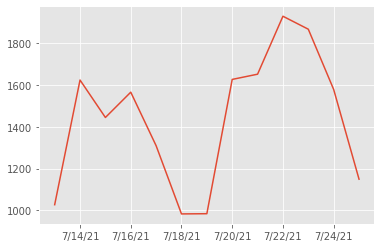

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

22.358698913019673